## Task 1 - Estarta AI internship
# Employees Data Analysis
### Nashat AlFarajat

#

#### importing 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_link=r"C:\Users\NSHAT\Estarta - internship\task 1\Employee Sample Data - A.xlsx"

In [3]:
df = pd.read_excel(data_link)
df.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55.0,2016-04-08,141604.0,0.15,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59.0,1997-11-29,99975.0,0.00,China,Chongqing,NaT
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50.0,2006-10-26,163099.0,0.20,United States,Chicago,NaT
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26.0,2019-09-27,84913.0,0.07,United States,Chicago,NaT
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55.0,1995-11-20,95409.0,0.00,United States,Phoenix,NaT


In [4]:
df.shape

(1000, 14)

In [5]:
df.describe()

,Age,Hire Date,Annual Salary,Bonus %,Exit Date
count,994.000000,993,989.00000,992.000000,85
mean,44.369215,2012-04-17 22:56:11.601208576,113372.62184,0.088972,2016-11-02 18:04:14.117647104
min,25.000000,1992-01-09 00:00:00,40063.00000,0.000000,1994-12-18 00:00:00
25%,35.000000,2007-02-24 00:00:00,71234.00000,0.000000,2014-12-25 00:00:00
50%,45.000000,2014-02-20 00:00:00,96567.00000,0.000000,2019-05-23 00:00:00
75%,54.000000,2018-06-25 00:00:00,151027.00000,0.150000,2021-04-09 00:00:00
max,65.000000,2021-12-26 00:00:00,258498.00000,0.400000,2022-08-17 00:00:00
std,11.248162,NaN,53729.04678,0.118135,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   EEID           1000 non-null   object        
 1   Full Name      998 non-null    object        
 2   Job Title      999 non-null    object        
 3   Department     998 non-null    object        
 4   Business Unit  1000 non-null   object        
 5   Gender         999 non-null    object        
 6   Ethnicity      993 non-null    object        
 7   Age            994 non-null    float64       
 8   Hire Date      993 non-null    datetime64[ns]
 9   Annual Salary  989 non-null    float64       
 10  Bonus %        992 non-null    float64       
 11  Country        998 non-null    object        
 12  City           998 non-null    object        
 13  Exit Date      85 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(3), object(9)
memory usage: 109.5+ KB


# 1 - Data Cleaning

### Missing Values

In [7]:
df.isnull().sum()

EEID               0
Full Name          2
Job Title          1
Department         2
Business Unit      0
Gender             1
Ethnicity          7
Age                6
Hire Date          7
Annual Salary     11
Bonus %            8
Country            2
City               2
Exit Date        915
dtype: int64

In [8]:
df.isnull().sum() # after removing the missing values that wont be filled

EEID               0
Full Name          2
Job Title          1
Department         2
Business Unit      0
Gender             1
Ethnicity          7
Age                6
Hire Date          7
Annual Salary     11
Bonus %            8
Country            2
City               2
Exit Date        915
dtype: int64

In [9]:
df.loc[df["Department"].isna(), ["Full Name", "Job Title", "Department"]] # to manually fill the departments

,Full Name,Job Title,Department
58,Zoey Jackson,Business Partner,NaN
112,Nova Coleman,System Administrator,NaN


In [10]:
df.loc[(df["Job Title"] == "System Administrator ") | (df["Job Title"] == "Business Partner"),["Full Name", "Job Title", "Department"]]

,Full Name,Job Title,Department
58,Zoey Jackson,Business Partner,NaN
85,Willow Mai,Business Partner,Human Resources
112,Nova Coleman,System Administrator,NaN
200,Jonathan Chavez,System Administrator,IT
262,Cameron Powell,Business Partner,Human Resources
328,Scarlett Figueroa,Business Partner,Human Resources
350,Andrew Huynh,Business Partner,Human Resources
356,Genesis Xiong,System Administrator,IT
387,Jose Brown,System Administrator,IT
405,Wesley Adams,System Administrator,IT


In [11]:
#manually filling the missing Values
df.loc[(df["Department"].isna()) & (df["Job Title"] == "System Administrator "), "Department"] = "IT"
df.loc[(df["Department"].isna()) & (df["Job Title"] == "Business Partner"), "Department"] = "Human Resources"

In [12]:
#missing values in salary, will be filled using the mean of salary for employees in the same dept and business unit and job title
df.loc[df["Annual Salary"].isna(),["Full Name", "Job Title", "Department","Business Unit"]]

,Full Name,Job Title,Department,Business Unit
11,Camila Rogers,Controls Engineer,Engineering,Speciality Products
55,Piper Lewis,Field Engineer,Engineering,Research & Development
94,Matthew Chau,Sr. Business Partner,Human Resources,Research & Development
108,Andrew Thomas,Controls Engineer,Engineering,Manufacturing
115,Connor Joseph,Director,Human Resources,Corporate
130,Ezekiel Reed,Sr. Manger,IT,Manufacturing
150,Joseph Ruiz,Field Engineer,Engineering,Manufacturing
151,Avery Bailey,Sr. Analyst,Sales,Speciality Products
152,Miles Hsu,Analyst II,Finance,Research & Development
153,Piper Cheng,Enterprise Architect,IT,Manufacturing


In [13]:
print(df.loc[(df["Job Title"] == "Controls Engineer") & (df["Department"] == "Engineering") & (df["Business Unit"] == "Speciality Products"),"Annual Salary"].mean())
print(df.loc[(df["Job Title"] == "Field Engineer") & (df["Department"] == "Engineering") & (df["Business Unit"] == "Research & Development"),"Annual Salary"].mean())
print(df.loc[(df["Job Title"] == "Sr. Business Partner") & (df["Department"] == "Human Resources") & (df["Business Unit"] == "Research & Development"),"Annual Salary"].mean())
print(df.loc[(df["Job Title"] == "Controls Engineer") & (df["Department"] == "Engineering") & (df["Business Unit"] == "Manufacturing"),"Annual Salary"].mean())

110760.0
78075.25
86491.0
103179.33333333333


In [14]:
df.loc[(df["Annual Salary"].isna()) &(df["Job Title"] == "Controls Engineer") &(df["Department"] == "Engineering") &(df["Business Unit"] == "Speciality Products"),"Annual Salary"] = 110760.0

df.loc[(df["Annual Salary"].isna()) &(df["Job Title"] == "Field Engineer") &(df["Department"] == "Engineering") &(df["Business Unit"] == "Research & Development"),"Annual Salary"] = 78075.25

df.loc[(df["Annual Salary"].isna()) &(df["Job Title"] == "Sr. Business Partner") &(df["Department"] == "Human Resources") &(df["Business Unit"] == "Research & Development"),"Annual Salary"] = 86491.0

df.loc[(df["Annual Salary"].isna()) &(df["Job Title"] == "Controls Engineer") &(df["Department"] == "Engineering") &(df["Business Unit"] == "Manufacturing"),"Annual Salary"] = 103179.33

In [15]:
#for Bouns %, Same as Annual Salary
df.loc[df["Bonus %"].isna(),["Full Name", "Job Title", "Department","Business Unit"]] 

,Full Name,Job Title,Department,Business Unit
17,Camila Silva,Sr. Manger,Marketing,Speciality Products
115,Connor Joseph,Director,Human Resources,Corporate
130,Ezekiel Reed,Sr. Manger,IT,Manufacturing
150,Joseph Ruiz,Field Engineer,Engineering,Manufacturing
151,Avery Bailey,Sr. Analyst,Sales,Speciality Products
152,Miles Hsu,Analyst II,Finance,Research & Development
153,Piper Cheng,Enterprise Architect,IT,Manufacturing
154,Skylar Watson,Network Architect,IT,Speciality Products


In [16]:
print(df.loc[(df["Job Title"] == "Sr. Manger") & (df["Department"] == "Marketing") & (df["Business Unit"] == "Speciality Products"),"Bonus %"].mean())

0.125


In [17]:
df.loc[(df["Bonus %"].isna()) &(df["Job Title"] == "Sr. Manger") &(df["Department"] == "Marketing") &(df["Business Unit"] == "Speciality Products"),"Bonus %"] = 0.125

In [18]:
# checking the name of the employee with the missing gender value
df.loc[df["Gender"].isna(),["Full Name"]]

,Full Name
112,Nova Coleman


In [19]:
# its Nova, so obv a Feamale
df["Gender"] = df["Gender"].fillna("Female")

In [20]:
#finally filling the missing Age with the mean of ages of Employees
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [21]:
df.isnull().sum()

EEID               0
Full Name          2
Job Title          1
Department         0
Business Unit      0
Gender             0
Ethnicity          7
Age                0
Hire Date          7
Annual Salary      7
Bonus %            7
Country            2
City               2
Exit Date        915
dtype: int64

## Duplicates

In [22]:
print(df.duplicated().sum())

0


## Cheking outliers (for Age and Annual salary)

In [23]:
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["Age"] < lower_bound) | (df["Age"] > upper_bound)]
print(outliers)

Empty DataFrame
Columns: [EEID, Full Name, Job Title, Department, Business Unit, Gender, Ethnicity, Age, Hire Date, Annual Salary, Bonus %, Country, City, Exit Date]
Index: []


In [24]:
Q1 = df["Annual Salary"].quantile(0.25)
Q3 = df["Annual Salary"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_salary = df[(df["Annual Salary"] < lower_bound) | (df["Annual Salary"] > upper_bound)]
print(outliers_salary)

Empty DataFrame
Columns: [EEID, Full Name, Job Title, Department, Business Unit, Gender, Ethnicity, Age, Hire Date, Annual Salary, Bonus %, Country, City, Exit Date]
Index: []


In [38]:
Q1 = df["Bonus %"].quantile(0.25)
Q3 = df["Bonus %"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_salary = df[(df["Bonus %"] < lower_bound) | (df["Bonus %"] > upper_bound)]
print(outliers_salary)

       EEID        Full Name       Job Title       Department  \
74   E00791   Thomas Padilla  Vice President        Marketing   
134  E02464     Sophie Silva  Vice President      Engineering   
168  E00085        Isla Wong  Vice President       Accounting   
172  E03506       Jaxson Mai  Vice President  Human Resources   
202  E00715      Elijah Kang  Vice President      Engineering   
209  E01486        Mason Cho  Vice President       Accounting   
232  E04742     Kinsley Vega  Vice President       Accounting   
263  E01232  Samantha Foster  Vice President  Human Resources   
284  E02944      Joshua Fong  Vice President      Engineering   
324  E04779    Cameron Young  Vice President      Engineering   
411  E04962        Elena Tan  Vice President      Engineering   
449  E02633  Allison Roberts  Vice President            Sales   
462  E03226    Angel Stewart  Vice President          Finance   
489  E00325     Jameson Chen  Vice President        Marketing   
591  E02687  Caroline Nel

### so no outliers but in bonus (but all are vice presedents so its normal that its  high)

# 2 - Changing the first 5 rows 

In [25]:
new_data = [
    ["E10001", "Nashat Alfarajat", "AI Secialist", "IT", "Research & Development", "Male", "Arab", 20, "2022-01-15", 130000, 0.15, "Jordan", "Amman", pd.NaT],
    ["E10002", "Nour Mansour", "Computer Systems Manager", "IT", "Speciality Products", "Male", "Arab", 29, "2020-06-22", 75000, 0.07, "Jordan", "Amman", pd.NaT],
    ["E10003", "Khalil Maaitah", "Analyst", "Finance", "Research & Development", "Male", "Arab", 32, "2015-04-10", 52000, 0.10, "United States", "Chicago", pd.NaT],
    ["E10004", "Sarah kamal", "Controls Engineer", "Engineering", "Manufacturing", "Female", "Caucasian", 37, "2018-09-05", 71000, 0.08, "United States", "Seattle", pd.NaT],
    ["E10005", "Mohammad Alfarajat", "Manager", "Marketing", "Research & Development", "Male", "Arab", 26, "2021-02-18", 100000, 0.06, "Jordan", "Amman", pd.NaT]
]

In [26]:
df.loc[:4, :] = pd.DataFrame(new_data, columns=df.columns)

In [27]:
df.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E10001,Nashat Alfarajat,AI Secialist,IT,Research & Development,Male,Arab,20.0,2022-01-15,130000.0,0.15,Jordan,Amman,NaT
1,E10002,Nour Mansour,Computer Systems Manager,IT,Speciality Products,Male,Arab,29.0,2020-06-22,75000.0,0.07,Jordan,Amman,NaT
2,E10003,Khalil Maaitah,Analyst,Finance,Research & Development,Male,Arab,32.0,2015-04-10,52000.0,0.10,United States,Chicago,NaT
3,E10004,Sarah kamal,Controls Engineer,Engineering,Manufacturing,Female,Caucasian,37.0,2018-09-05,71000.0,0.08,United States,Seattle,NaT
4,E10005,Mohammad Alfarajat,Manager,Marketing,Research & Development,Male,Arab,26.0,2021-02-18,100000.0,0.06,Jordan,Amman,NaT


## 3- Row with largest salary

In [28]:
print(max(df["Annual Salary"]))

258498.0


In [29]:
df.loc[df["Annual Salary"] == 258498.0]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
989,E04354,Raelynn Rios,Vice President,Sales,Manufacturing,Female,Latino,43.0,2016-08-21,258498.0,0.35,United States,Columbus,NaT


## 4- Group by Department, getting average salary and average age

In [30]:
df.groupby("Department")[["Age", "Annual Salary"]].mean()

,Age,Annual Salary
Department,,
Accounting,43.656250,123146.947917
Engineering,45.612385,108905.927722
Finance,44.969489,122502.432203
Human Resources,44.456000,117523.411290
IT,44.162949,97762.485232
Marketing,43.074380,129417.884298
Sales,43.609780,111225.338129


## 5- Group by Department + Ethnicity, maximum age,minimum age, median salary

In [31]:
grouped = df.groupby(["Department", "Ethnicity"])
result = grouped[["Age", "Annual Salary"]].agg({"Age": ["max", "min"],"Annual Salary": "median"})
result.columns = ["Max Age", "Min Age", "Median Salary"]
result = result.reset_index()
result.head(10)

,Department,Ethnicity,Max Age,Min Age,Median Salary
0,Accounting,Asian,64.0,25.0,114893.0
1,Accounting,Black,51.0,30.0,91853.0
2,Accounting,Caucasian,62.0,26.0,121159.5
3,Accounting,Latino,62.0,26.0,92317.0
4,Engineering,Asian,65.0,25.0,91230.0
5,Engineering,Black,56.0,27.0,74412.0
6,Engineering,Caucasian,64.0,25.0,91621.0
7,Engineering,Latino,64.0,27.0,96818.0
8,Finance,Arab,32.0,32.0,52000.0
9,Finance,Asian,64.0,25.0,125329.0


## 6- saving to excel file

In [32]:
df.to_excel(r"C:\Users\NSHAT\Estarta - internship\task 1\Employee Sample Data Cleaned.xlsx",index=False)

 # Plotting and Gaining Insights

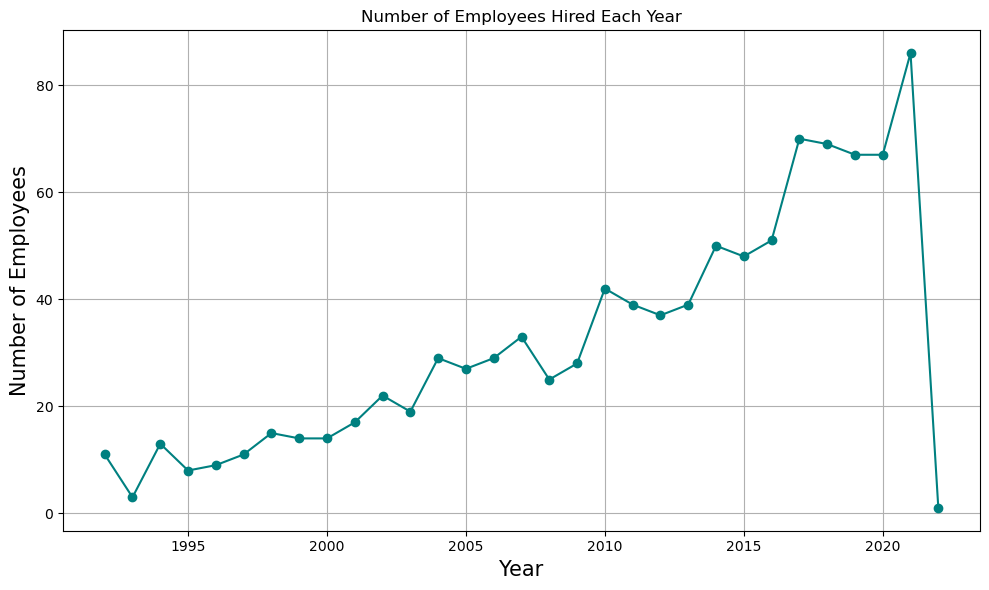

In [33]:
df['Hire Year'] = df['Hire Date'].dt.year
# Count employees hired each year
hire_counts = df['Hire Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(hire_counts.index, hire_counts.values, marker='o', color='teal', linestyle='-')

plt.title('Number of Employees Hired Each Year')
plt.xlabel('Year',size=15)
plt.ylabel('Number of Employees',size=15)
plt.grid(True)
plt.tight_layout()
plt.show()


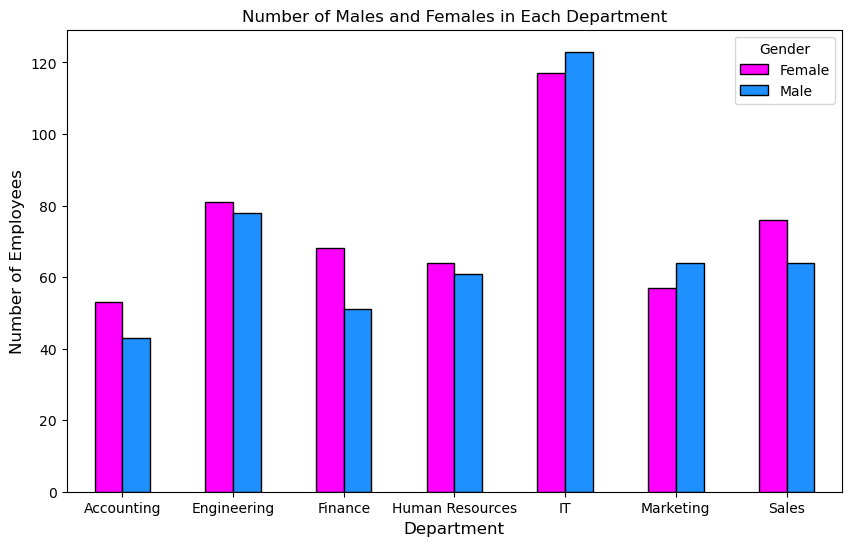

In [34]:
import matplotlib.pyplot as plt

gender_counts = df.groupby(['Department', 'Gender']).size().unstack(fill_value=0)

gender_counts.plot(kind='bar', figsize=(10, 6), edgecolor='black',color=["Magenta","DodgerBlue"])

plt.title('Number of Males and Females in Each Department')
plt.xlabel('Department',size=12)
plt.ylabel('Number of Employees',size=12)
plt.xticks(rotation=0,size=10)
plt.legend(title='Gender')

plt.show()


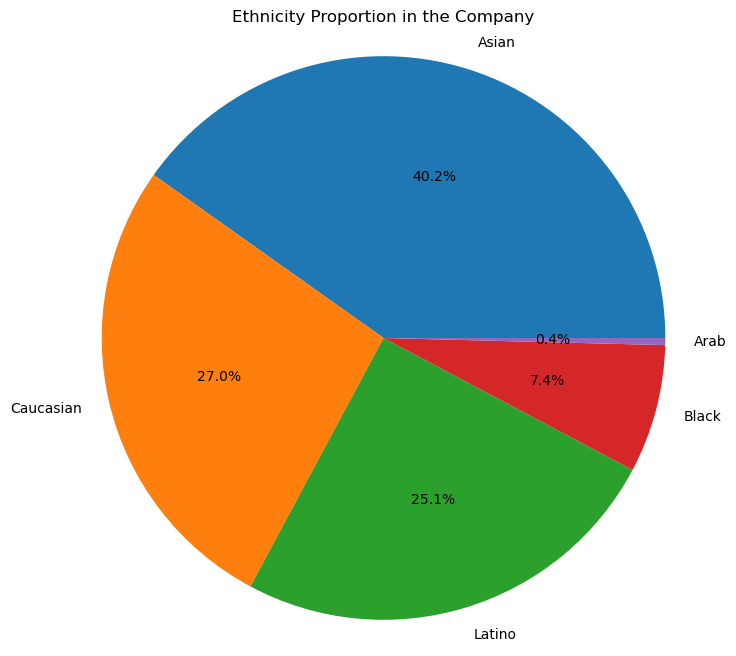

In [35]:
ethnicity_counts = df['Ethnicity'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(ethnicity_counts, labels=ethnicity_counts.index, autopct='%1.1f%%',colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title('Ethnicity Proportion in the Company')
plt.axis('equal')  # Equal aspect ratio to make pie circular
plt.show()


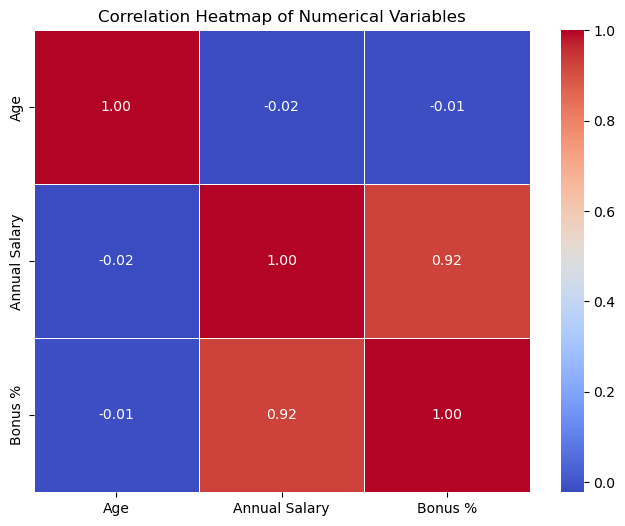

In [36]:
numerical_cols = ['Age', 'Annual Salary', 'Bonus %']

corr = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap of Numerical Variables')
plt.show()